In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

! unzip cats_and_dogs_filtered.zip

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

--2023-08-16 15:26:13--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.174.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.174.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  22.3MB/s    in 2.9s    

2023-08-16 15:26:16 (22.3 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.

In [2]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="cats_and_dogs_filtered/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="cats_and_dogs_filtered/validation", target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [4]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Total params: 134,268,738
Trainable params: 134,268,738
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=1,generator=traindata, validation_data= testdata, validation_steps=1,epochs=10,callbacks=[checkpoint,early])

<ipython-input-5-d7b290e2f6ba>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=1,generator=traindata, validation_data= testdata, validation_steps=1,epochs=10,callbacks=[checkpoint,early])


Epoch 1/10
1/1 [==============================] - ETA: 0s - loss: 0.7196 - accuracy: 0.5312

1/1 [==============================] - 99s 99s/step - loss: 0.7196 - accuracy: 0.5312 - val_loss: 18692.2070 - val_accuracy: 0.3438
Epoch 2/10
1/1 [==============================] - ETA: 0s - loss: 10571.2734 - accuracy: 0.6250

1/1 [==============================] - 88s 88s/step - loss: 10571.2734 - accuracy: 0.6250 - val_loss: 3.1002 - val_accuracy: 0.5938
Epoch 3/10
1/1 [==============================] - ETA: 0s - loss: 2.6613 - accuracy: 0.6250

1/1 [==============================] - 88s 88s/step - loss: 2.6613 - accuracy: 0.6250 - val_loss: 1.6118 - val_accuracy: 0.4062
Epoch 4/10
1/1 [==============================] - ETA: 0s - loss: 1.5638 - accuracy: 0.4375

1/1 [==============================] - 93s 93s/step - loss: 1.5638 - accuracy: 0.4375 - val_loss: 0.6908 - val_accuracy: 0.5625
Epoch 5/10
1/1 [==============================] - ETA: 0s - loss: 0.7185 - accuracy: 0.4062

1/1 [==============================] - 91s 91s/step - loss: 0.7185 - accuracy: 0.4062 - val_loss: 0.7095 - val_accuracy: 0.4062
Epoch 6/10
1/1 [==============================] - ETA: 0s - loss: 0.6944 - accuracy: 0.5000

1/1 [==============================] - 89s 89s/step - loss: 0.6944 - accuracy: 0.5000 - val_loss: 0.6989 - val_accuracy: 0.4375
Epoch 7/10
1/1 [==============================] - ETA: 0s - loss: 0.6892 - accuracy: 0.5625

1/1 [==============================] - 89s 89s/step - loss: 0.6892 - accuracy: 0.5625 - val_loss: 1.1317 - val_accuracy: 0.4688
Epoch 8/10
1/1 [==============================] - ETA: 0s - loss: 0.6961 - accuracy: 0.6875

1/1 [==============================] - 88s 88s/step - loss: 0.6961 - accuracy: 0.6875 - val_loss: 0.7259 - val_accuracy: 0.4062
Epoch 9/10
1/1 [==============================] - ETA: 0s - loss: 0.6961 - accuracy: 0.5312

1/1 [==============================] - 89s 89s/step - loss: 0.6961 - accuracy: 0.5312 - val_loss: 0.7363 - val_accuracy: 0.5625
Epoch 10/10
1/1 [==============================] - ETA: 0s - loss: 0.7773 - accuracy: 0.5312

1/1 [==============================] - 90s 90s/step - loss: 0.7773 - accuracy: 0.5312 - val_loss: 0.6962 - val_accuracy: 0.4688


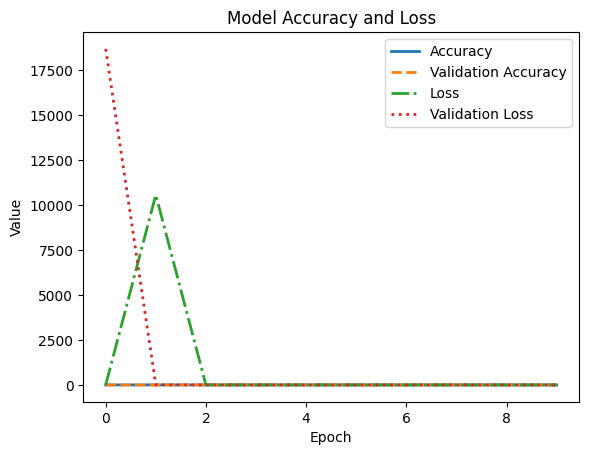

In [6]:
plt.plot(hist.history["accuracy"], linestyle='-', linewidth=2)  # Solid line
plt.plot(hist.history['val_accuracy'], linestyle='--', linewidth=2)  # Dashed line
plt.plot(hist.history['loss'], linestyle='-.', linewidth=2)  # Dash-dot line
plt.plot(hist.history['val_loss'], linestyle=':', linewidth=2)  # Dotted line

plt.title("Model Accuracy and Loss")
plt.ylabel("Value")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])
plt.show()